<a href="https://colab.research.google.com/github/renyuanL/110_project/blob/main/ryFindPortfolioToMeet5yGoal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


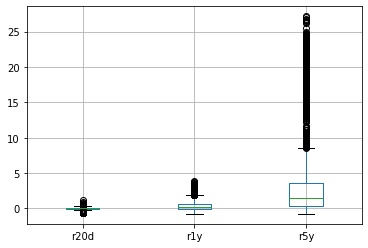

In [98]:
try:
  import yfinance as yf
except:
  !pip install yfinance
import yfinance as yf

import pandas as pd


def ryGetReturnRate(tkName= 'AAPL', startDate= '1980-01-01'):
    
  tk= yf.Ticker(tkName)
  tk= tk.history(start= startDate)
  tk= tk[['Close']]
  tk= tk.rename(columns= {'Close': tkName})
            
  r5y= (tk-tk.shift(periods=252*5))/tk.shift(periods=252*5)
  r2y= (tk-tk.shift(periods=252*2))/tk.shift(periods=252*2)
  r1y= (tk-tk.shift(periods=252))/tk.shift(periods=252)
  r120d= (tk-tk.shift(periods=120))/tk.shift(periods=120)
  r60d= (tk-tk.shift(periods=60))/tk.shift(periods=60)
  r20d= (tk-tk.shift(periods=20))/tk.shift(periods=20)

  tk['r20d']= r20d
  tk['r60d']= r60d
  tk['r120d']= r120d
  tk['r1y']= r1y
  tk['r2y']= r2y
  tk['r5y']= r5y

  aDes= tk.describe()
  aDes.loc['sem',:]= aDes.loc['std',:]/aDes.loc['count',:]**.5
  aDes.loc['95%itrvl',:]= aDes.loc['sem',:] * 1.96
  aDes

  return tk, aDes

def ryReturnRateReport(tkName= 'AAPL', startDate= '1980-01-01'):
  tk, aDes= ryGetReturnRate(tkName, startDate)
  tk[['r20d','r1y','r5y']].boxplot()

  #print(f'tkName= {tkName}')
  #print(f'since {tk.index[0].date()}')
  #print(aDes[['r20d','r1y','r5y']])

  return tk, aDes

tk, aDes= ryReturnRateReport()


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

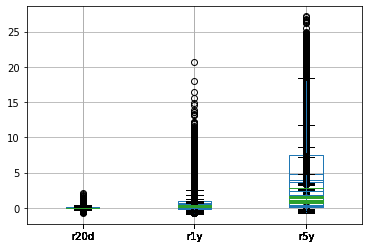

In [99]:
stockList= ['^GSPC','SPY','QQQ','VOO',
       'AAPL','AMZN','MSFT','GOOGL',
       'NVDA','TSM','COST','KO'] 
aL= {}
for x in stockList:
  tk, aDes= ryReturnRateReport(x)
  aL[x]= {'ret':tk, 'des':aDes}


In [100]:

with pd.ExcelWriter('_ry.xlsx',mode='w') as fp:  # doctest: +SKIP
  for x in aL:
    #aL[x]['ret'].to_excel(fp,sheet_name= aL[x]['ret'].columns[0])
    aL[x]['des'].to_excel(fp,sheet_name= aL[x]['des'].columns[0]+'_des')


In [101]:
aL[x]['des']['r5y'].loc['mean']

1.2814297547939844

- 數字代表 【倍數】 ，需乘上 100% 才是 % 表示法
- 此數字是 "任意" 5年區間 的報酬率
- 資料來自 Yahoo Finance 自 1980-01-01 以來所能撈取的數據。


In [105]:
b= {}
for x in stockList:
  mu= aL[x]['des']['r5y'].loc['mean']
  sigma= aL[x]['des']['r5y'].loc['std']
  _max= aL[x]['des']['r5y'].loc['max']
  _min= aL[x]['des']['r5y'].loc['min']
  b[x]= {'mu':mu, 
      'sigma':sigma,
      'max': _max,
      'min': _min}

比較股票之5年報酬率= pd.DataFrame(b).T

比較股票之5年報酬率.sort_values(by='mu')


,mu,sigma,max,min
^GSPC,0.604093,0.526469,2.195263,-0.415201
SPY,0.655425,0.652233,2.480681,-0.355249
QQQ,0.756278,0.744310,2.693092,-0.689008
VOO,0.848277,0.194660,1.374203,0.170765
COST,1.065981,1.217361,7.327904,-0.471204
TSM,1.093314,1.083676,6.594689,-0.680579
KO,1.281430,1.224325,4.810462,-0.472411
GOOGL,1.304854,0.699727,3.612539,-0.110036
AAPL,2.631706,3.801191,27.176436,-0.778257
AMZN,2.797150,1.813347,12.547466,-0.624605


In [106]:
b= {}
for x in stockList:
  mu= aL[x]['des']['r1y'].loc['mean']
  sigma= aL[x]['des']['r1y'].loc['std']
  _max= aL[x]['des']['r1y'].loc['max']
  _min= aL[x]['des']['r1y'].loc['min']
  b[x]= {'mu':mu, 
      'sigma':sigma,
      'max': _max,
      'min': _min}

比較股票之1年報酬率= pd.DataFrame(b).T

比較股票之1年報酬率.sort_values(by='mu')

,mu,sigma,max,min
^GSPC,0.102167,0.162887,0.747797,-0.488228
SPY,0.114744,0.170083,0.775045,-0.473541
QQQ,0.123105,0.275713,1.289372,-0.697015
VOO,0.145171,0.109957,0.783434,-0.187859
COST,0.154037,0.263615,1.151786,-0.519531
KO,0.165070,0.227443,1.005173,-0.362147
GOOGL,0.245263,0.326474,1.887206,-0.616176
TSM,0.263362,0.513491,3.301084,-0.634757
MSFT,0.329534,0.486513,4.180315,-0.646996
AAPL,0.344428,0.644963,3.826900,-0.751830
